# Задача 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flight_delays.csv')
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [3]:
df_delays = df[(df['dep_delayed_15min'] == 'Y')]
df_delays

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
18,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y
21,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y
33,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y
35,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y
...,...,...,...,...,...,...,...,...,...
99971,c-7,c-31,c-1,2027,DL,ATL,SJC,2116,Y
99976,c-5,c-20,c-5,2117,MQ,LGA,BGR,378,Y
99980,c-4,c-28,c-4,2222,XE,EWR,DAB,884,Y
99989,c-4,c-11,c-1,1730,WN,JAN,BWI,888,Y


#### 1) Доля всех задержек ко всем вылетам

In [4]:
len(df_delays)/len(df)

0.19044

In [5]:
df0 = pd.Series([len(df_delays), len(df) - len(df_delays)], index = ['delays', 'not_delays'])
# df0

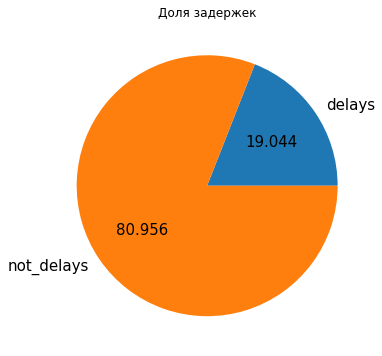

In [6]:
df0.plot.pie(figsize = (10, 6), title = 'Доля задержек', autopct="%.3f", fontsize = 15)
plt.ylabel('')
plt.show()

#### 2) Зависимость количества задержек от длины пути, который предстоит пролететь самолёту

In [7]:
df1 = df_delays.value_counts(df['Distance'])
# df1

In [8]:
df2 = pd.DataFrame(df1.index)
# display(df2)

In [9]:
df2.insert(0, 'Count_of_delays', df1.to_numpy())
display(df2)

,Count_of_delays,Distance
0,91,337
1,90,403
2,89,612
3,88,528
4,87,370
...,...,...
1197,1,1101
1198,1,1128
1199,1,1134
1200,1,1138


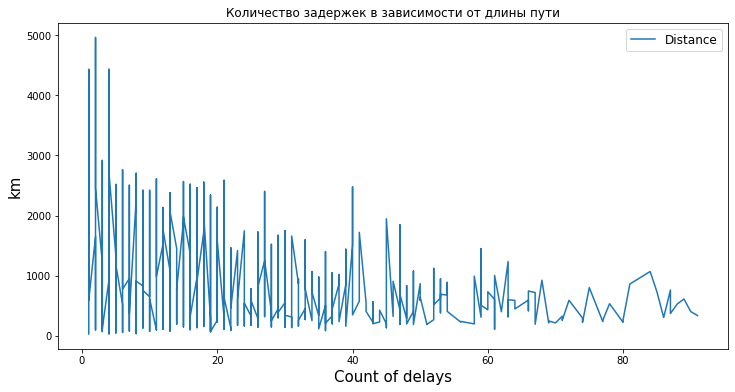

In [10]:
df2.plot(x = "Count_of_delays", y = "Distance", figsize = (12, 6), title = 'Количество задержек в зависимости от длины пути')
plt.ylabel('km', fontsize = 15)
plt.xlabel('Count of delays', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

#### 3) Топ 5 направлений, для которых чаще всего происходят задержки

In [11]:
df3 = df_delays.value_counts(df_delays['Dest'])
# df3

In [12]:
df4 = pd.DataFrame(df3.index)
# display(df4)

In [13]:
df4.insert(1, 'Count_of_delays', df3.to_numpy())
display(df4)

,Dest,Count_of_delays
0,ATL,1281
1,ORD,1072
2,DFW,656
3,EWR,584
4,LAX,525
...,...,...
271,GGG,1
272,SMX,1
273,HTS,1
274,BRW,1


In [14]:
display(df4[:5])

,Dest,Count_of_delays
0,ATL,1281
1,ORD,1072
2,DFW,656
3,EWR,584
4,LAX,525


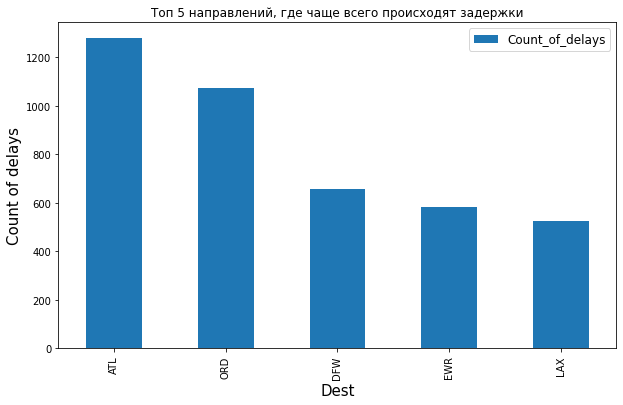

In [15]:
df4[:5].plot.bar(x = 'Dest', figsize = (10, 6), title = 'Топ 5 направлений, где чаще всего происходят задержки')
plt.ylabel('Count of delays', fontsize = 15)
plt.xlabel('Dest', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

#### 4) В какие времена года чаще всего происходят задержки рейсов

In [16]:
df5 = df_delays.value_counts(df_delays['Month'])
# df5

In [17]:
arr = []
for i in df5.index:
    arr.append(int(i[2:]))
# print(arr)

In [18]:
df6 = pd.DataFrame({'Month' : arr})
# display(df6)

In [19]:
df6.insert(1, 'Count_of_delays', df5.to_numpy())
df6 = df6.sort_values(by = ['Month'])
df6 = df6.reset_index()
df6.pop('index')
df6 = df6.replace(list(range(1, 13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
display(df6)

,Month,Count_of_delays
0,Jan,1539
1,Feb,1316
2,Mar,1676
3,Apr,1306
4,May,1313
5,Jun,1867
6,Jul,2073
7,Aug,1783
8,Sep,1279
9,Oct,1501


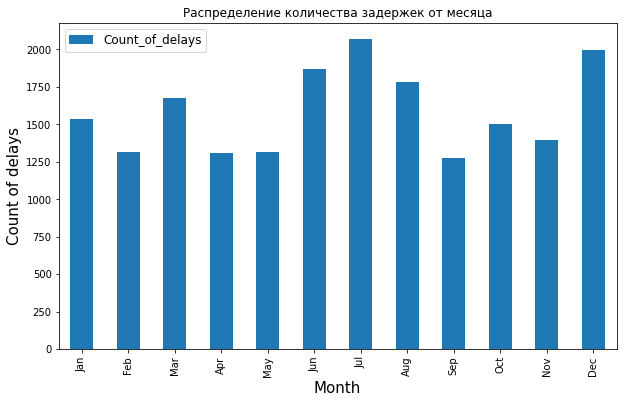

In [20]:
df6.plot.bar(x = 'Month', figsize = (10, 6), title = 'Распределение количества задержек от месяца')
plt.ylabel('Count of delays', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

#### Топ 3 месяца, в которых больше всего задержек:

In [21]:
display(df6.sort_values(by = ['Count_of_delays'], ascending = False)[:3])

,Month,Count_of_delays
6,Jul,2073
11,Dec,1994
5,Jun,1867


#### 5) Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [22]:
df7 = df_delays.value_counts(df_delays['UniqueCarrier'], ascending = True)
# df7

In [23]:
df8 = pd.DataFrame(df7.index)
# display(df8)

In [24]:
df8.insert(1, 'Count_of_delays', df7.to_numpy())
display(df8)

,UniqueCarrier,Count_of_delays
0,AQ,18
1,HA,33
2,TZ,64
3,DH,156
4,F9,156
5,HP,196
6,B6,393
7,YV,478
8,AS,541
9,FL,736


In [25]:
display(df8[:10])

,UniqueCarrier,Count_of_delays
0,AQ,18
1,HA,33
2,TZ,64
3,DH,156
4,F9,156
5,HP,196
6,B6,393
7,YV,478
8,AS,541
9,FL,736


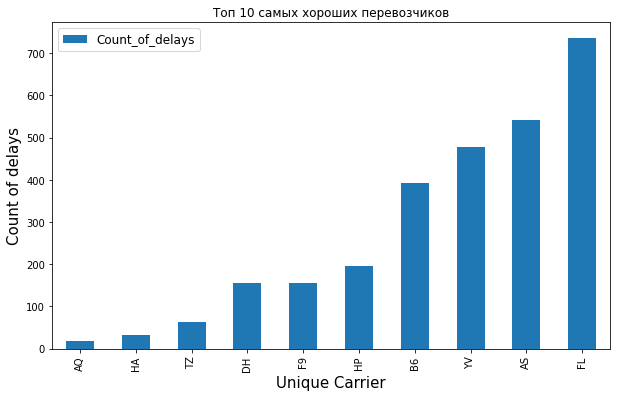

In [26]:
df8[:10].plot.bar(x = 'UniqueCarrier', figsize = (10, 6), title = 'Топ 10 самых хороших перевозчиков')
plt.ylabel('Count of delays', fontsize = 15)
plt.xlabel('Unique Carrier', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

#### 6) Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [27]:
df9 = df_delays.value_counts(df_delays['Origin'])
# df9

In [28]:
df10 = pd.DataFrame(df9.index)
# display(df10)

In [29]:
df10.insert(1, 'Count_of_delays', df9.to_numpy())
display(df10)

,Origin,Count_of_delays
0,ATL,1506
1,ORD,1254
2,DFW,902
3,DEN,575
4,LAX,552
...,...,...
264,CDC,1
265,SJT,1
266,BTM,1
267,BRO,1


In [30]:
display(df10[:10])

,Origin,Count_of_delays
0,ATL,1506
1,ORD,1254
2,DFW,902
3,DEN,575
4,LAX,552
5,LAS,546
6,EWR,538
7,IAH,492
8,PHX,491
9,DTW,401


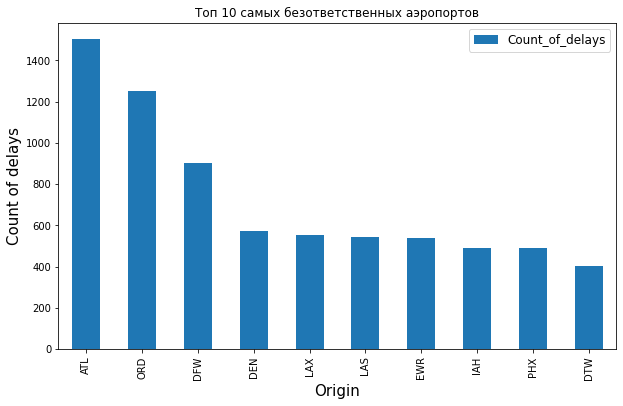

In [31]:
df10[:10].plot.bar(x = 'Origin', figsize = (10, 6), title = 'Топ 10 самых безответственных аэропортов')
plt.ylabel('Count of delays', fontsize = 15)
plt.xlabel('Origin', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

#### 7) В какие дни месяца чаще всего происходят задержки рейсов

In [32]:
df11 = df_delays.value_counts(df_delays['DayofMonth'])
# df11

In [33]:
arr = []
for i in df11.index:
    arr.append(int(i[2:]))
# print(arr)

In [34]:
df12 = pd.DataFrame({'DayofMonth' : arr})
# display(df12)

In [35]:
df12.insert(1, 'Count_of_delays', df11.to_numpy())
df12 = df12.sort_values(by = ['DayofMonth'])
display(df12)

,DayofMonth,Count_of_delays
14,1,610
13,2,623
28,3,547
29,4,539
12,5,625
25,6,562
20,7,577
22,8,570
27,9,555
17,10,595


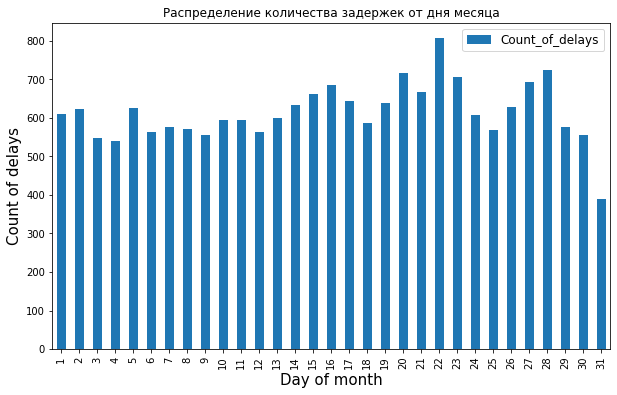

In [36]:
df12.plot.bar(x = 'DayofMonth', figsize = (10, 6), title = 'Распределение количества задержек от дня месяца')
plt.ylabel('Count of delays', fontsize = 15)
plt.xlabel('Day of month', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

#### Топ 3 дня в месяце, в которых больше всего задержек:

In [37]:
display(df12.sort_values(by = ['Count_of_delays'], ascending = False)[:3])

,DayofMonth,Count_of_delays
0,22,806
1,28,723
2,20,715


# Задача 2

In [39]:
t = np.linspace(0, 6.28, num = 1000)
x = np.sin(t) ** 3
y = np.cos(t) - 0.5 * np.cos(2*t) - 0.06 * np.cos(3*t) - 0.09 * np.cos(4*t) - 0.45

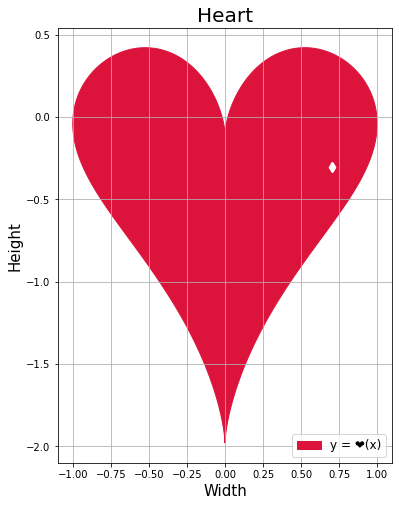

In [41]:
plt.figure(figsize = (6, 8))
# plt.axline((0, 0), (1, 0), c = 'black', linewidth = 0.4)
plt.fill(x, y, color = 'Crimson')
plt.scatter(0.7, -0.3, marker = 'd', c = 'w', linewidths = 2.5)

plt.xlabel('Width', fontsize = 15)
plt.ylabel('Height', fontsize = 15)
plt.legend(['y = \u2764(x)'], fontsize = 12, loc = 'lower right')
plt.grid()
plt.title('Heart', fontsize = 20)

plt.show()
# я не смог сделать нормальную сетку, она нкак не ложится под график(((. Но зато я очень долго искал подходящее уравнение сердечка)